In [73]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


In [79]:
# 모델 정의
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(8, 2)  # 8 input features → 2 classes (0/1)

    def forward(self, x):
        return self.fc(x)

model = ClassificationModel()

Epoch 1, Loss: 0.7152, Test Accuracy: 50.00%
Epoch 2, Loss: 0.7136, Test Accuracy: 50.65%
Epoch 3, Loss: 0.7119, Test Accuracy: 50.65%
Epoch 4, Loss: 0.7103, Test Accuracy: 50.65%
Epoch 5, Loss: 0.7086, Test Accuracy: 51.30%
Epoch 6, Loss: 0.7070, Test Accuracy: 51.95%
Epoch 7, Loss: 0.7054, Test Accuracy: 51.95%
Epoch 8, Loss: 0.7038, Test Accuracy: 52.60%
Epoch 9, Loss: 0.7022, Test Accuracy: 51.95%
Epoch 10, Loss: 0.7006, Test Accuracy: 51.95%


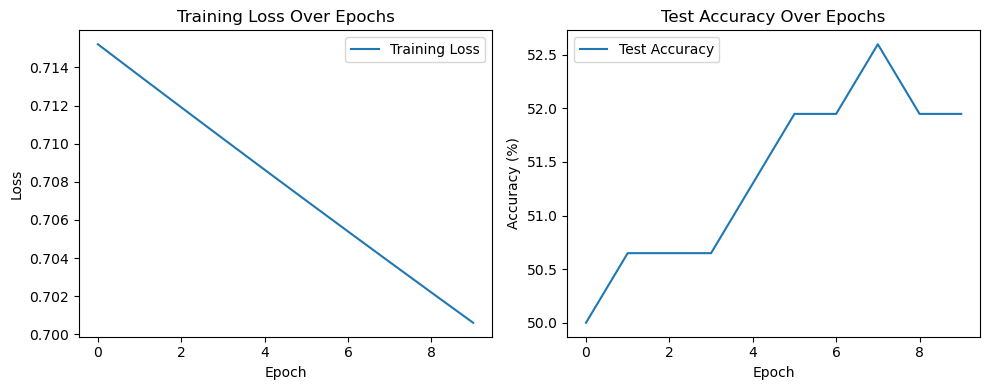

In [81]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 손실함수, 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 기록용 리스트
train_losses = []
test_accuracies = []

# 학습
for epoch in range(10):
    # 모델 학습
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # 테스트 정확도 계산
    with torch.no_grad():
        preds = model(X_test)
        preds_class = torch.argmax(preds, dim=1)
        acc = (preds_class == y_test).float().mean() * 100  # 퍼센트로 변환
        test_accuracies.append(acc.item())

    # 에폭별 결과 출력
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Test Accuracy: {acc:.2f}%")

# 📈 Loss & Accuracy 같이 시각화
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()



## 모델의 문제점

- **구조가 너무 단순함**  
  ➔ `Linear(8 → 2)` 단일 레이어 구성
- **학습 에폭이 적다**  
  ➔ 10 에폭만 학습, 충분한 수렴이 안 됨
- **학습률이 너무 낮음**  
  ➔ `lr=0.001`로 학습 속도가 너무 느림
- **정확도 및 손실 감소 미미**  
  ➔ Loss 변화 거의 없음, Accuracy 50%대 (랜덤 추측 수준)


## 개선을 위한 모델 변경

- **모델 복잡도 증가**
  - `Linear(8 → 32)` + `ReLU` + `Linear(32 → 2)` 구조로 변경
- **학습률 조정**
  - `lr=0.001` → `lr=0.005`로 증가
- **학습 에폭 증가**
  - 10 → 50 에폭으로 늘려 충분히 학습
- **시각화 추가**
  - Loss 및 Test Accuracy를 에폭별로 기록하고 그래프로 시각화


Epoch 1/50, Loss: 0.7041, Test Accuracy: 57.79%
Epoch 5/50, Loss: 0.6402, Test Accuracy: 68.83%
Epoch 10/50, Loss: 0.5817, Test Accuracy: 70.78%
Epoch 15/50, Loss: 0.5382, Test Accuracy: 72.08%
Epoch 20/50, Loss: 0.5064, Test Accuracy: 70.78%
Epoch 25/50, Loss: 0.4823, Test Accuracy: 73.38%
Epoch 30/50, Loss: 0.4633, Test Accuracy: 74.68%
Epoch 35/50, Loss: 0.4504, Test Accuracy: 74.68%
Epoch 40/50, Loss: 0.4425, Test Accuracy: 74.03%
Epoch 45/50, Loss: 0.4362, Test Accuracy: 74.03%
Epoch 50/50, Loss: 0.4304, Test Accuracy: 74.68%


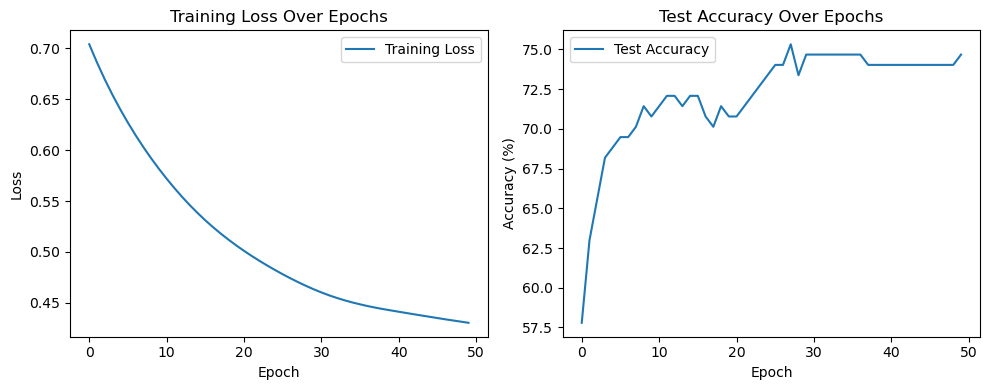

In [83]:
# 📦 개선된 모델
class BetterModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 32)  # 은닉층 추가
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = BetterModel()

# 📦 손실함수, 옵티마이저
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # 학습률도 살짝 올림

# 📦 학습 기록용 리스트
train_losses = []
test_accuracies = []

# 📦 학습
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # 📦 테스트 정확도 계산
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        preds = test_outputs.argmax(1)
        acc = (preds == y_test).float().mean() * 100  # 퍼센트로 변환
        test_accuracies.append(acc.item())

    # 📢 에폭별 출력
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Test Accuracy: {acc:.2f}%")

# 📈 Loss & Accuracy 같이 시각화
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## 3. 개선 결과

- **Training Loss**
  - 초반 빠르게 감소, 이후 서서히 수렴 (0.7 → 0.4)
- **Test Accuracy**
  - 57% → 75%로 상승
- **학습 안정성**
  - Loss 감소 + Accuracy 증가 패턴이 자연스러움
- **과적합 없음**
  - Train/Test 정확도 차이 없이 안정적으로 수렴
